## Table Of Contents:
1. [Data Preprocessing](#1)
    * [Friday, October 5](#oct5)
    * [Tuesday, October 9](#oct9)
        * [200 ms batches vs `stim_train`](#200-ms-vs-stim)

# Data Preprocessing <a class="anchor" id="1"></a>
### Friday, October 5  <a class="anchor" id="oct5"></a>

> Please find attached an exemplar input file for the simulations we are running.

> I also attached a dictionary with the X and Z coordinate of each innervating fiber.

> Stimuli are presented every 200 ms.

In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
np.set_printoptions(suppress=True)

In [2]:
with open('data/input/proj_xz.pkl', 'rb') as f:
    xz = pkl.load(f, encoding='latin1')

In [3]:
xz_array = np.zeros((1, 2))
keys = []
for key in xz:
    keys.append(key)
    xz_array = np.concatenate((xz_array, xz[key].reshape((1, 2))), axis=0)
keys = np.array(keys).reshape(-1, 1)
xz_array = np.concatenate((keys, xz_array[1:]), axis=1)

In [4]:
xz_array

array([[ 221184.   ,     489.488,     591.93 ],
       [ 221185.   ,     206.701,     563.71 ],
       [ 221186.   ,     319.906,     457.568],
       ..., 
       [ 221181.   ,     250.45 ,     495.846],
       [ 221182.   ,     479.566,     650.127],
       [ 221183.   ,     391.449,     464.526]])

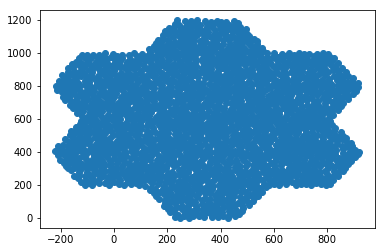

In [5]:
plt.scatter(xz_array[:, 1], xz_array[:, 2]) # background hexagonal structure
plt.show()

### Tuesday, October 9  <a class="anchor" id="oct9"></a>
- `"input.dat"` contains spiking times paired with GIDs (global IDs)
- Patterns go in 200 ms packs
- To make pictures, add up activities over each 200 ms

In [6]:
input_ = np.loadtxt('data/input/input.dat', skiprows=1)
input_ = np.flip(input_, axis=1)

In [7]:
print(input_)
print(input_.shape)

[[ 221184.          1200.406006]
 [ 221184.          1801.768311]
 [ 221184.          1864.717529]
 ..., 
 [ 221183.         26553.761719]
 [ 221183.         27957.466797]
 [ 221183.         29371.466797]]
(77654, 2)


In [8]:
print("Avg fibres per spike time: {}".format(input_.shape[0] / np.unique(input_[:, 1]).shape[0]))

Avg fibres per spike time: 21.685004188774087


In [9]:
# Take all GIDs for each unique spike time.
times = np.unique(input_[:, 1])
times_ids = [input_[:, 0][np.argwhere(input_ == i)[:, 0]] for i in times]

In [10]:
times_ids[0]

array([ 220747.,  220750.,  220756.,  220762.,  220765.,  220773.,
        220774.,  220778.,  220781.,  220786.,  220788.,  220796.,
        220801.,  220806.,  220808.,  220809.,  220821.,  220826.,
        220828.,  220837.,  220849.,  220862.,  220873.,  220898.])

In [11]:
# Translate GIDs into coordinates for each spike time.
times_xz = []
for ids in times_ids:
    a = [xz_array[np.argwhere(xz_array == id_)[:, 0], :] for id_ in ids]
    times_xz.append(np.concatenate(a))

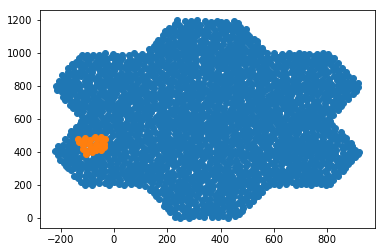

In [12]:
plt.scatter(xz_array[:, 1], xz_array[:, 2]) # background hexagonal structure
plt.scatter(times_xz[0][:, 1], times_xz[0][:, 2]) # single spike time pattern
plt.show()

In [13]:
# Bin spike times into 200 ms intervals.
batches_200 = []
batch_num = 0
i_start = 0
for i, time in enumerate(times):
    num = int(time // 200)
    if num > batch_num:
        batch_num = num
        batches_200.append(slice(i_start, i))
        i_start = i

In [16]:
stim_train = [249980, 397555, 446691, 205315, 397555, 249980, \
              757795, 397555, 740558, 249980, 397555, 249980, \
              766947, 740558, 446691, 766947, 205315, 205315, \
              766947, 515018, 740558, 740558, 249980, 515018, \
              757795, 740558, 515018, 397555, 740558, 249980, \
              446691, 397555, 757795, 766947, 757795, 397555, \
              766947, 740558, 446691, 766947, 205315, 740558, \
              757795, 515018, 397555, 397555, 249980, 515018, \
              205315, 446691, 205315, 205315, 446691, 740558, \
              446691, 205315, 249980, 515018, 766947, 446691, \
              757795, 397555, 757795, 397555, 757795, 515018, \
              740558, 757795, 446691, 397555, 249980, 446691, \
              515018, 515018, 446691, 515018, 766947, 249980, \
              515018, 757795, 766947, 205315, 740558, 515018, \
              205315, 740558, 205315, 766947, 740558, 249980, \
              205315, 205315, 515018, 740558, 515018, 446691, \
              397555, 757795, 766947, 515018, 397555, 205315, \
              397555, 397555, 205315, 249980, 740558, 397555, \
              757795, 249980, 757795, 766947, 446691, 757795, \
              766947, 766947, 446691, 446691, 757795, 515018, \
              446691, 446691, 766947, 740558, 740558, 766947, \
              515018, 249980, 757795, 446691, 249980, 766947, \
              205315, 446691, 249980, 766947, 757795, 249980, \
              249980, 397555, 515018, 757795, 249980, 397555, 205315]

In [79]:
stim_train = np.array(stim_train)

In [80]:
np.unique(stim_train)

array([205315, 249980, 397555, 446691, 515018, 740558, 757795, 766947])

In [81]:
len(stim_train)

145

In [105]:
# Bin spike times into 145 bins (length of unique values of `stim_train`).
hist, _ = np.histogram(times, 145)
batches_145_inds = [np.sum(hist[:i]) for i in range(len(hist)+1)]
batches_145 = [slice(batches_145_inds[i], batches_145_inds[i+1]) for i in range(len(hist))]

In [114]:
# Make an animation representing all 200 ms(/145 bins) batches.
fig, ax = plt.subplots()
ax.scatter(xz_array[:, 1], xz_array[:, 2])
ln1, = ax.plot([], [], 'ro', alpha=0.5, animated=True)
ln2, = ax.plot([], [], 'go', alpha=0.5, animated=True)

def update(frame):
    xz = np.vstack(times_xz[batches_200[frame]])
    ln1.set_data(xz[:, 1], xz[:, 2])
    if frame < len(batches_145):
        xz = np.vstack(times_xz[batches_145[frame]])
        ln2.set_data(xz[:, 1], xz[:, 2])
    return ln1, ln2

ani = animation.FuncAnimation(fig, update, frames=len(batches_200),\
                              interval=200, blit=True)
ani.save("data/batches_145_200.mp4")

## 200 ms batches vs `stim_train`  <a class="anchor" id="200-ms-vs-stim"></a>
Check whether the 200 ms batches correctly represent `stim_train`.

In [129]:
# Contains GIDs for each 200 ms batch.
times_batched = [np.sort(np.vstack(times_xz[batch])[:, 0]) for batch in batches_200]

In [125]:
len(times_batched)

149

In [131]:
# Hash to check unique batches.
times_batched_hashed = [hash(batch.tostring()) for batch in times_batched]

In [132]:
np.unique(times_batched_hashed).shape

(149,)

This means that every batch has a unique set of fibres. But theoretically, there shouldn't be exactly the same 200 ms batches.

But, as I understood, there should be more or less the same patterns for the same stim_train numbers. Further down, I try to check this.

[  3  16  17  40  48  50  51  55  81  84  86  90  91 101 104 132 144]


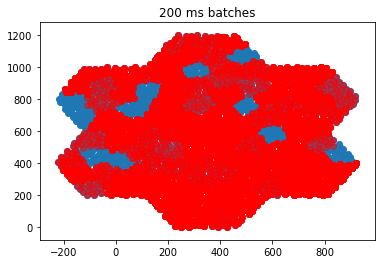

In [145]:
# Pick all indices from `stim_train` with the same specific value (representing the same pattern).
# 200 ms batches
pick = np.argwhere(stim_train == 205315).reshape(-1)
print(pick)
plt.title('200 ms batches')
plt.scatter(xz_array[:, 1], xz_array[:, 2]) # background hexagonal structure
for i in pick:
    xz = np.vstack(times_xz[batches_200[i]])
    plt.scatter(xz[:, 1], xz[:, 2], c='r', alpha=0.5)
plt.show()

[  3  16  17  40  48  50  51  55  81  84  86  90  91 101 104 132 144]


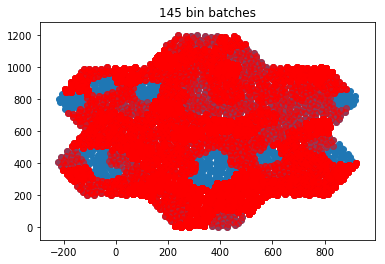

In [144]:
# Pick all indices from `stim_train` with the same specific value (representing the same pattern).
pick = np.argwhere(stim_train == 205315).reshape(-1)
print(pick)
plt.title('145 bin batches')
plt.scatter(xz_array[:, 1], xz_array[:, 2]) # background hexagonal structure
for i in pick:
    xz = np.vstack(times_xz[batches_145[i]])
    plt.scatter(xz[:, 1], xz[:, 2], c='r', alpha=0.5)
plt.show()

I plotted such plots for several values of `stim_train`.

Before plotting, I assumed that there should be distinct parts (<50% of the area) of the overall structure covered (not almost everything, like I got here).

From this I can conclude that either
- I haven't successfully synchronised batches with `stim_train` (or this `stim_train` was from a different input file)
- or my assumption was incorrect in that I shouldn't think of the patterns as each covering little area but rather as the "continuous" activity disctibution.